Based on the data in the provided datasets, address the following questions:

1.Calculate the correlation between the price of $OCEAN and the number of tweets containing "$OCEAN". What conclusions can be drawn from this correlation?

2.Determine the correlation between the price of $OCEAN and the number of likes received by tweets containing "$OCEAN". What insights can be derived from this correlation?

3.Establish the correlation between the price of $OCEAN and the number of retweets generated by tweets containing "$OCEAN". What conclusions can be made from this correlation?

4.Assess the correlation between the price of $OCEAN and the number of individuals tweeting with the cashtag "$OCEAN". What conclusions can be drawn from this correlation?

5.Analyze the impact of influential tweets on the price of the OCEAN token. What conclusions can be drawn from this analysis?

In [70]:
import pandas as pd
import numpy as np
import matplotlib
from textblob import TextBlob
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


tweets_data = pd.read_csv('tweets_data.csv', encoding= 'utf-8-sig')
token_data = pd.read_csv('token_data.csv', encoding= 'utf-8-sig')


In [71]:
# tweets_data = tweets_data[['date', 'tweet']].sample(frac=0.2, replace=True, random_state=1)

In [72]:
print(min(token_data['Date']))
print(max(token_data['Date']))
print(min(tweets_data['date']))
print(max(tweets_data['date']))

2019-05-06
2023-05-29
2019-12-31
2022-10-22


In [73]:
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
token_data['Date'] = pd.to_datetime(token_data['Date'])
min_date = min(tweets_data['date'])
max_date = max(tweets_data['date'])
date_range = pd.date_range(start=min_date, end=max_date)
token_data = token_data[token_data['Date'].isin(date_range)]

In [74]:
print(min(token_data['Date']))
print(max(token_data['Date']))
print(min(tweets_data['date']))
print(max(tweets_data['date']))

2019-12-31 00:00:00
2022-10-22 00:00:00
2019-12-31 00:00:00
2022-10-22 00:00:00


In [75]:
number_of_tweets = tweets_data.groupby(tweets_data['date'].dt.date).size()
price_token_data = token_data[['Date', 'Open']]
print(price_token_data)

           Date      Open
239  2019-12-31  0.032700
240  2020-01-01  0.037197
241  2020-01-02  0.039209
242  2020-01-03  0.034774
243  2020-01-04  0.036902
...         ...       ...
1261 2022-10-18  0.152237
1262 2022-10-19  0.167924
1263 2022-10-20  0.164792
1264 2022-10-21  0.165484
1265 2022-10-22  0.160583

[1027 rows x 2 columns]


In [76]:
dataframe_tweets = tweets_data.groupby('date').agg({'tweet': 'count', 'likes_count': 'sum','retweets_count':'sum'}).reset_index()
dataframe_tweets.columns = ['date', 'tweet', 'number_of_likes', 'number_of_rt']
price_token_data = token_data[['Date', 'Open']]
fused_data = pd.merge(dataframe_tweets,price_token_data,left_on='date',right_on='Date')
fused_data = fused_data.drop('Date', axis=1)

shift_value = 1
fused_data_shifted = fused_data[['Open','date','tweet', 'number_of_likes', 'number_of_rt']]
fused_data_shifted['Open']=fused_data_shifted['Open'].shift(shift_value)
fused_data_shifted = fused_data_shifted.dropna()

In [77]:
correlation_number_tweets = fused_data['tweet'].corr(fused_data['Open'], method='pearson')
print('Correlation between number of tweets and $OCEAN price:', correlation_number_tweets) 

Correlation between number of tweets and $OCEAN price: 0.42474060083322007


In [78]:
correlation_number_tweets_shifted = fused_data_shifted['tweet'].corr(fused_data_shifted['Open'], method='pearson')
print('Correlation between number of tweets and $OCEAN price shifted:', correlation_number_tweets_shifted ) 

Correlation between number of tweets and $OCEAN price shifted: 0.4045914274382715


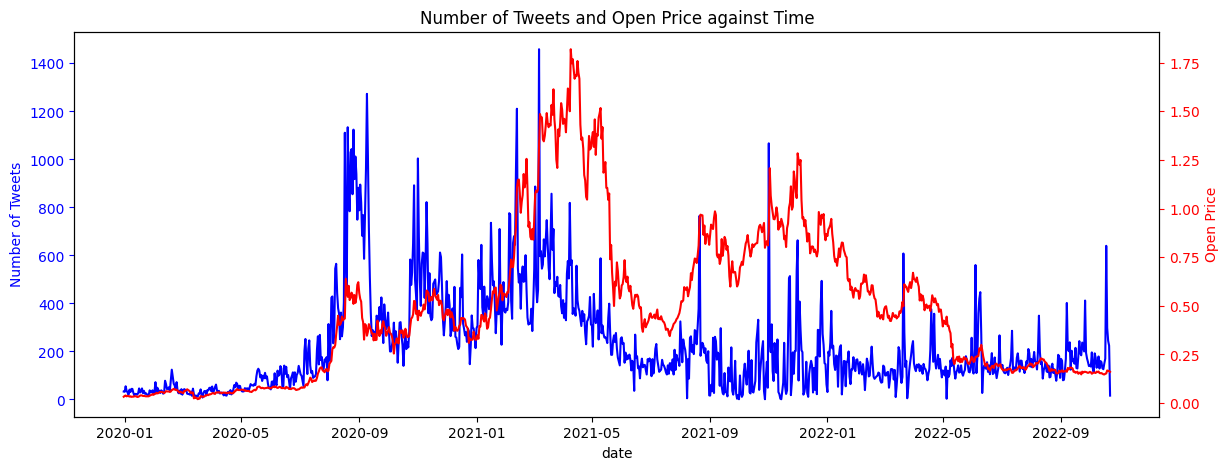

In [79]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data['date'], fused_data['tweet'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('Number of Tweets', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(fused_data['date'], fused_data['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of Tweets and Open Price against Time')
plt.show()

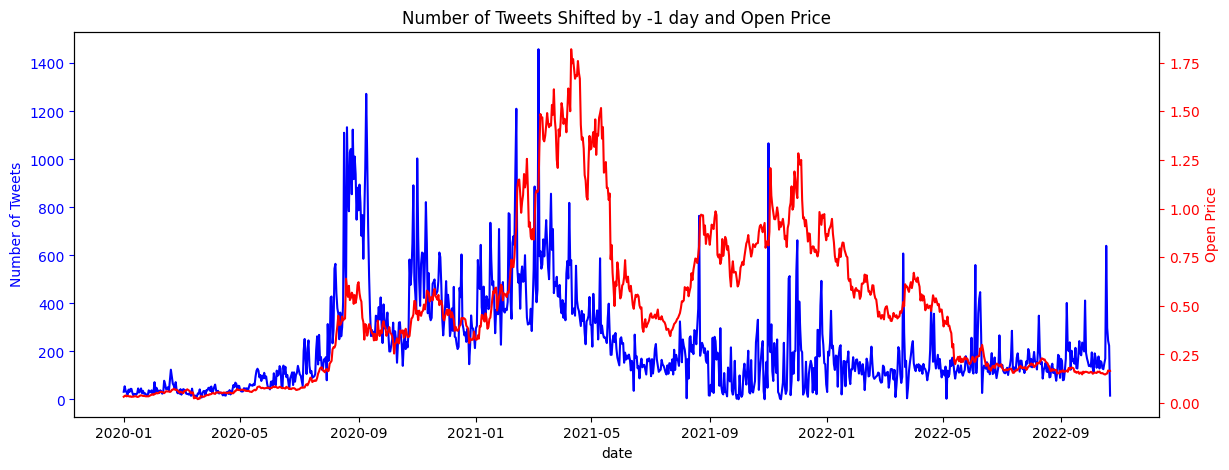

In [80]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data_shifted['date'], fused_data_shifted['tweet'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('Number of Tweets', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(fused_data_shifted['date'], fused_data_shifted['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of Tweets Shifted by -1 day and Open Price')
plt.show()

#
2.Determine the correlation between the price of $OCEAN and the number of likes received by tweets containing "$OCEAN". What insights can be derived from this correlation?


In [110]:
shift_value = 1
fused_data_shifted = fused_data[['Open','date','tweet', 'number_of_likes', 'number_of_rt']]
fused_data_shifted['Open']=fused_data_shifted['Open'].shift(shift_value)
fused_data_shifted = fused_data_shifted.dropna()

In [108]:
correlation_number_likes = fused_data['number_of_likes'].corr(fused_data['Open'], method='pearson')
correlation_number_likes_shifted = fused_data_shifted['number_of_likes'].corr(fused_data_shifted['Open'], method='pearson')
print('Correlation:', correlation_number_likes ) 
print('Correlation:', correlation_number_likes_shifted ) 

Correlation: 0.5634658242212687
Correlation: 0.5386478381148821


In [101]:
correlation_number_rt = fused_data['number_of_rt'].corr(fused_data['Open'], method='pearson')
correlation_number_rt_shifted = fused_data_shifted['number_of_rt'].corr(fused_data_shifted['Open'], method='pearson')
print('Correlation:', correlation_number_likes ) 
print('Correlation shifted:', correlation_number_likes_shifted ) 

Correlation: 0.5634658242212687
Correlation shifted: 0.5386478381148821


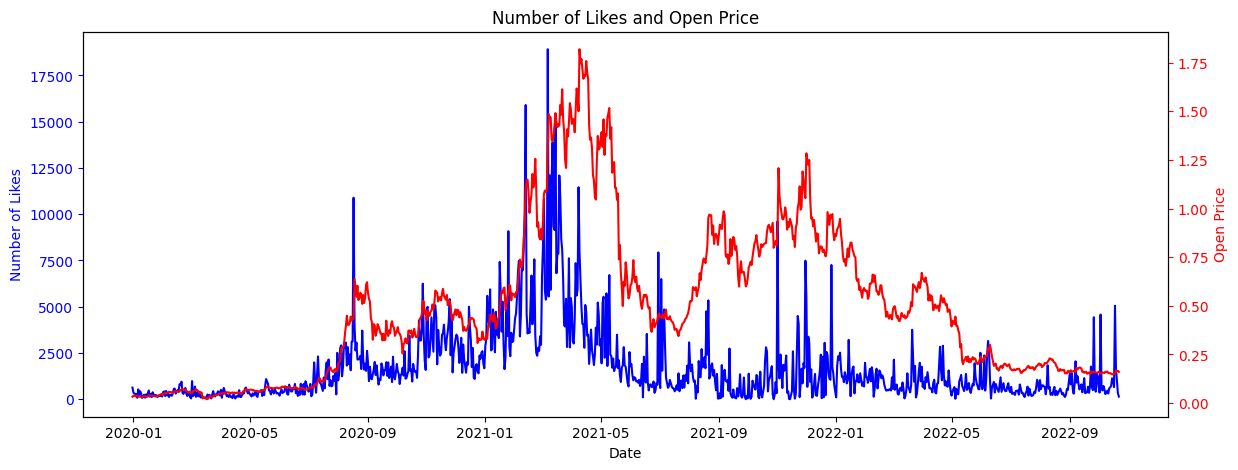

In [83]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data['date'], fused_data['number_of_likes'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Likes', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(fused_data['date'], fused_data['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of Likes and Open Price')
plt.show()

3.Establish the correlation between the price of $OCEAN and the number of retweets generated by tweets containing "$OCEAN". What conclusions can be made from this correlation?


In [102]:
correlation_number_rt = fused_data['number_of_rt'].corr(fused_data['Open'], method='pearson')
print('Correlation retweets with time :', correlation_number_rt ) 

Correlation retweets with time : 0.46471949017021413


In [111]:
correlation_number_rt_shifted = fused_data_shifted['number_of_rt'].corr(fused_data_shifted['Open'], method='pearson')
print('Correlation:', correlation_number_rt_shifted ) 

Correlation: 0.440065035660019


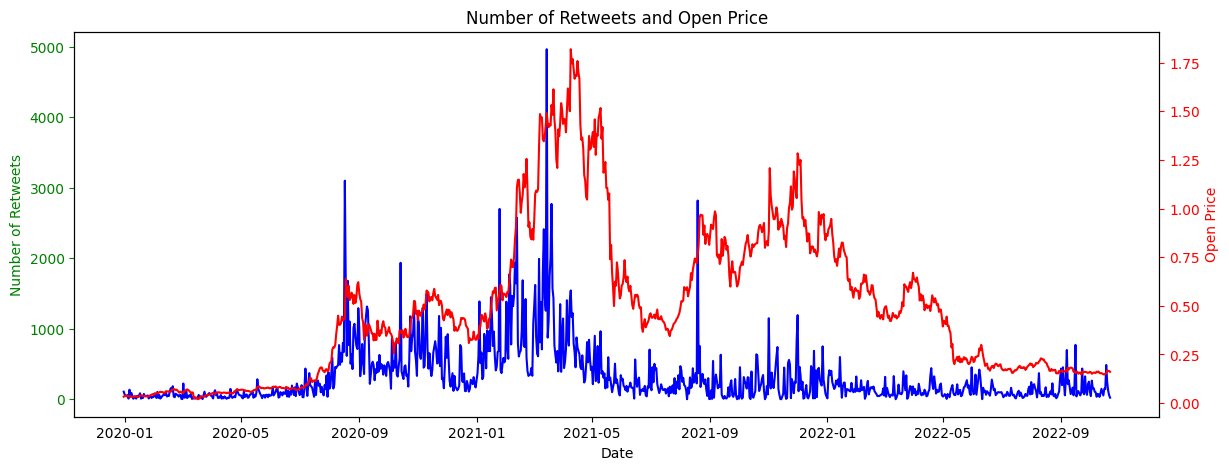

In [85]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data['date'], fused_data['number_of_rt'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Retweets', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(fused_data['date'], fused_data['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of Retweets and Open Price')
plt.show()

4.Assess the correlation between the price of $OCEAN and the number of individuals tweeting with the cashtag "$OCEAN". What conclusions can be drawn from this correlation?


In [86]:
tweets_data_individuals = tweets_data[['date','username']]
tweets_data_individuals = tweets_data_individuals.drop_duplicates(subset = ['date','username'],keep="first", inplace=False)

tweets_data_individuals = tweets_data_individuals.groupby('date').agg({'username': 'count'}).reset_index()
tweets_data_individuals.columns = ['date', 'number_individuals']

price_token_data = token_data[['Date', 'Open']]
fused_data_individuals = pd.merge(tweets_data_individuals,price_token_data,left_on='date',right_on='Date')
fused_data_individuals = fused_data_individuals.drop('Date', axis=1)
fused_data_individuals

,date,number_individuals,Open
0,2019-12-31,26,0.032700
1,2020-01-01,21,0.037197
2,2020-01-02,34,0.039209
3,2020-01-03,24,0.034774
4,2020-01-04,17,0.036902
...,...,...,...
1020,2022-10-18,280,0.152237
1021,2022-10-19,180,0.167924
1022,2022-10-20,137,0.164792
1023,2022-10-21,121,0.165484


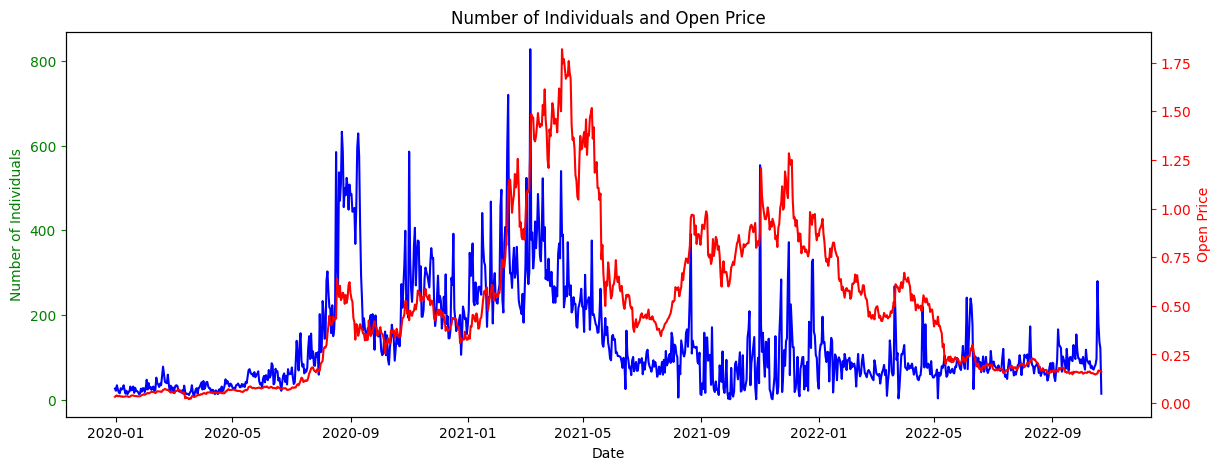

In [87]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data_individuals['date'], fused_data_individuals['number_individuals'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Individuals', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(fused_data_individuals['date'], fused_data_individuals['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of Individuals and Open Price')
plt.show()


In [113]:
correlation_number_individuals = fused_data_individuals['number_individuals'].corr(fused_data_individuals['Open'], method='pearson')
print('Correlation between number of individuals and price :', correlation_number_individuals ) 

Correlation between number of individuals and price : 0.479836770029259


## Correlation Bullrun Period

In [103]:
date_end_bullrun = pd.to_datetime('2021-09-01')
bullrun_data = fused_data[fused_data['date'] < date_end_bullrun]

correlation_bullrun_data_like = bullrun_data['number_of_likes'].corr(bullrun_data['Open'], method='pearson')
print('Correlation between nb of likes and price during bullrun period:', correlation_bullrun_data_like ) 

outside_bullrun_data = fused_data[fused_data['date'] > date_end_bullrun]

correlation_outside_bullrun_data_like = outside_bullrun_data['number_of_likes'].corr(outside_bullrun_data['Open'], method='pearson')
print('Correlation between nb of likes and price outside bullrun period:', correlation_outside_bullrun_data_like ) 


Correlation between nb of likes and price during bullrun period: 0.6731568042812198
Correlation between nb of likes and price outside bullrun period: 0.2890136443463288


In [109]:
date_end_bullrun = pd.to_datetime('2021-09-01')
bullrun_data = fused_data[fused_data['date'] < date_end_bullrun]

correlation_bullrun_data_rt = bullrun_data['number_of_rt'].corr(bullrun_data['Open'], method='pearson')
print('Correlation between nb of rt and price during bullrun period:', correlation_bullrun_data_rt ) 

outside_bullrun_data = fused_data[fused_data['date'] > date_end_bullrun]

correlation_outside_bullrun_data_rt = outside_bullrun_data['number_of_rt'].corr(outside_bullrun_data['Open'], method='pearson')
print('Correlation between nb of rt and price outside bullrun period:', correlation_outside_bullrun_data_rt ) 


Correlation between nb of rt and price during bullrun period: 0.5498734722466746
Correlation between nb of rt and price outside bullrun period: 0.2955123040892653


In [114]:
bullrun_data_individuals = fused_data_individuals[fused_data_individuals['date'] < date_end_bullrun]
correlation_bullrun_individuals = bullrun_data_individuals['number_individuals'].corr(bullrun_data_individuals['Open'], method='pearson')
print('Correlation bullrun  period:', correlation_bullrun_individuals ) 

Correlation bullrun  period: 0.6082105057754138


In [115]:
bullrun_data_individuals = fused_data_individuals[fused_data_individuals['date'] > date_end_bullrun]
correlation_outside_bullrun_individuals = bullrun_data_individuals['number_individuals'].corr(bullrun_data_individuals['Open'], method='pearson')
print('Correlation outside bullrun  period:', correlation_outside_bullrun_individuals ) 

Correlation outside bullrun  period: 0.1224598763876795


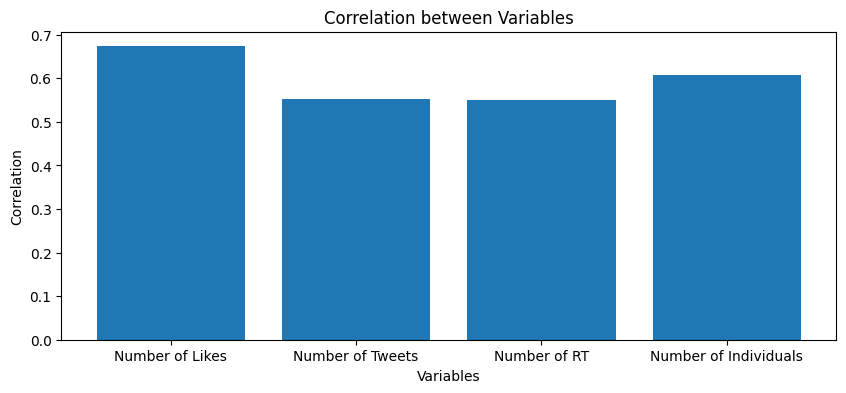

In [90]:
date_end_bullrun = pd.to_datetime('2021-09-01')
bullrun_data = fused_data[fused_data['date'] < date_end_bullrun]

correlation_bullrun_data_like = bullrun_data['number_of_likes'].corr(bullrun_data['Open'], method='pearson')
# print('Correlation bullrun likes period:', correlation_bullrun_data ) 
correlation_bullrun_data_tweet = bullrun_data['tweet'].corr(bullrun_data['Open'], method='pearson')
# print('Correlation bullrun likes period:', correlation_bullrun_data ) 
correlation_bullrun_data_rt = bullrun_data['number_of_rt'].corr(bullrun_data['Open'], method='pearson')
# print('Correlation bullrun likes period:', correlation_bullrun_data_ ) 

bullrun_data_individuals = fused_data_individuals[fused_data_individuals['date'] < date_end_bullrun]
correlation_bullrun_individuals = bullrun_data_individuals['number_individuals'].corr(bullrun_data_individuals['Open'], method='pearson')
# print('Correlation bullrun  period:', correlation_bullrun_individuals ) 

correlation_values = [correlation_bullrun_data_like, correlation_bullrun_data_tweet, correlation_bullrun_data_rt, correlation_bullrun_individuals]
correlation_labels = ['Number of Likes', 'Number of Tweets', 'Number of RT', 'Number of Individuals']

# Create a bar plot
plt.figure(figsize=(10, 4))
plt.bar(correlation_labels, correlation_values)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Variables')
plt.show()

5.Analyze the impact of influential tweets on the price of the OCEAN token. What conclusions can be drawn from this analysis?

In [163]:
tweets_data_influencial = tweets_data[['date','tweet','username','retweets_count','likes_count']]

likes_quartile = tweets_data_influencial['likes_count'].quantile(0.999)
retweet_quartile = tweets_data_influencial['retweets_count'].quantile(0.999)
print('95% quantile of the number of likes : ', likes_quartile)
print('95% quantile of the number of retweets : ', retweet_quartile)

95% quantile of the number of likes :  432.14400000002934
95% quantile of the number of retweets :  99.0


In [164]:
influencials_tweets = tweets_data_influencial[(tweets_data_influencial['likes_count'] >= likes_quartile) 
                                              & (tweets_data_influencial['retweets_count'] >= retweet_quartile)]
influencials_tweets_count = influencials_tweets.groupby('date').agg({'tweet': 'count'}).reset_index()
influencials_tweets_count.columns = ['date', 'number_tweets_influencial']


price_token_data = token_data[['Date', 'Open']]
fused_data_influencial = pd.merge(influencials_tweets_count,price_token_data,left_on='date',right_on='Date')
fused_data_influencial = fused_data_influencial.drop('Date', axis=1)

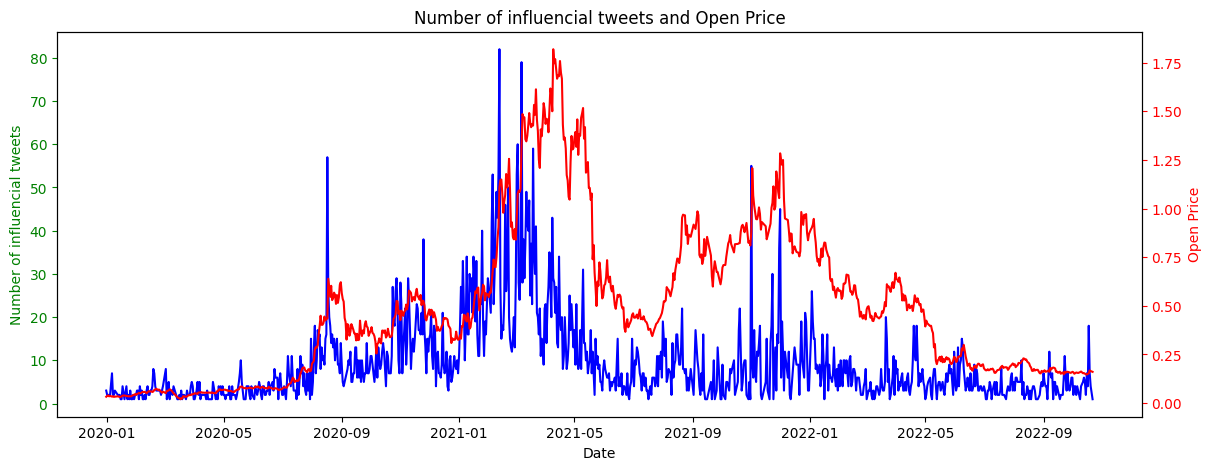

In [153]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data_influencial['date'], fused_data_influencial['number_tweets_influencial'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of influencial tweets', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(fused_data_influencial['date'], fused_data_influencial['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Number of influencial tweets and Open Price')
plt.show()
